# Comparing the State of the Data Job Market Across Southeast Asia

## Context / Background

#### Business Context:
Eskwelabs was launched in 2019 as a data upskilling school in the Philippines with a flagship data science bootcamp. In 2020, Eskwelabs also piloted business intelligence programs for data analyst career tracks. One key differentiating feature of the Eskwelabs experience is connection to industry and jobs. Data Science Fellows seeking full-time employment are given job guarantees and prior to the COVID pandemic, 90% of graduates were placed within 90 days, achieving an average 1.5x increase in pay. While the global and local economy has been affected by the COVID-19 pandemic in 2020, long-term trends in digitization and data means that the demand for data science and analytics jobs will remain buoyant. 

#### Business Problem:
Eskwelabs uses up-to-date industry information to inform curriculum, career support, and other educational experiences. In 2021, Eskwelabs wants to invite regional learners outside of the Philippines into the online learning experience and want to understand the local hiring context. To that end, Eskwelabs wants to understand data science and data analytics job markets in the Philippines, Indonesia, and Singapore. 

#### Main Research Question:
What do companies in the Philippines, Singapore, Indonesia look for when hiring for data related roles?

#### Key Stakeholders:
Current & Aspiring Data Scientists - those looking to enter the field or those seeking to move to other companies would want to know what qualifications they need to focus on to have a better chance of landing their dream job.

Bootcamps (Eskwelabs) - understanding the priorities of regional market companies in order to be able to recruit regional students to their bootcamps in the future. Findings from the study would also help them modify existing programs or even craft new ones to cater to existing companies who want to upskill their employees in data science.

Companies - learning more about the most used tools, technologies and practices in the rapidly evolving data science field, which they can also apply in their own respective organizations to improve their use of data in furthering company goals.

## Data Process Flow

#### Step 1: Web Scraping
The team chose to scrape job information from four (4) popular job sites in Southeast Asia. These are Indeed, Jobstreet, Glassdoor and Kalibrr. 

Refer to the Eskwelabs_CapstoneNotebook_Scraping.ipynb notebook for more information on the respective scraping scripts.

#### Step 2: Keyword Extraction (Job Description)
In order to extract the most relevant keywords from lengthy, unstructured, job descriptions, we used Doccano to create a custom Named Entity Recognition (NER) Model by manually annotating 300 Job Descriptions and tagging each relevant keyword to one of the following custom labels: SPEC_SKILL, GEN_SKILL, DEGREE, YRS_OF_EXP, EDUCATION_LVL, SALARY. After we were able to finish the annotation, we downloaded the completed custom model to be applied to our dataset.

Refer to the Eskwelabs_CapstoneNotebook_CustomNERwithDataCleaning.ipynb notebook for more information on the application of the custom NER model on our dataset.

#### Step 3: Data Cleaning
Removal of special characters and duplicate job entries. Our final dataset amounts to 4,699 Job Descriptions.

Refer to the Eskwelabs_CapstoneNotebook_CustomNERwithDataCleaning.ipynb notebook for more information on how we were able to clean our data.

#### Steps 4 & 5: Exploratory Data Analysis; Insight Generation and Conclusion
This notebook deals particularly with Exploratory Data Analysis (EDA) and our insight generation, along with our conclusion.

## Exploratory Data Analysis

### Generating WordClouds (Overview of Most Commonly Mentioned Keywords)

In [1]:
import nltk
import spacy
from spacy.pipeline import EntityRecognizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [6]:
#load data
df = pd.read_csv('df_EskwelabsCapstonev3.csv',index_col='Index',encoding='utf-8')

In [7]:
df.head()

Job Title                  Company  \
Index                                                            
0                      Data Scientist        Clark Outsourcing   
1             Data Analyst/ Scientist            Open iT, Inc.   
2      Data Analyst, Customer Success            Power Factors   
3            Associate Data Scientist                 Manulife   
4                      Data Scientist  Oak Drive Ventures Inc.   

                                Industry             Location      Country  \
Index                                                                        
0                  Professional Services  Clark Freeport Zone  Philippines   
1      Information Technology & Services               Lucena  Philippines   
2                                 Energy      Santa Rosa City  Philippines   
3           Banking, Finance & Insurance          Quezon City  Philippines   
4                          Conglomerates               Taguig  Philippines   

      Website                                         URL to Job  \
Index                                                              
0      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
1      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
2      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
3      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
4      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   

                                         Job Description Search Term Used  \
Index                                                                       
0      Our benefits include: Work directly with an in...   Data Scientist   
1      The Data Analyst/Scientist is intricately invo...   Data Scientist   
2      WHO WE ARE  We are Power Factors, developer of...   Data Scientist   
3      Are you looking for unlimited opportunities to...   Data Scientist   
4      JOB SUMMARY The Data Scientist is directly rep...   Data Scientist   

       Age Size EmploymentType  \
Index                            
0      NaN  NaN            NaN   
1      NaN  NaN            NaN   
2      NaN  NaN            NaN   
3      NaN  NaN            NaN   
4      NaN  NaN            NaN   

                                  Data Skills - Specific  \
Index                                                      
0      ['Spark', 'R', 'Python', 'Scala', 'Google Clou...   
1                                     ['Java', 'Python']   
2      ['Microsoft Power BI', 'SQL', 'Python', 'Power...   
3      ['SAS', 'SPSS', 'R', 'Python', 'Tableau', 'Qli...   
4                                                    NaN   

                                   Data Skills - General Experience (years)  \
Index                                                                         
0      ['machine learning models', 'statistical theor...        ['3 years']   
1      ['data transformation', 'pattern recognition',...      ['Two years']   
2      ['report writing', 'propose workflow', 'statis...        ['5 years']   
3      ['statistical tests', 'distributions', 'maximu...                NaN   
4      ['data modelling', 'create algorithms', 'predi...                NaN   

                           Education Level  \
Index                                        
0      ["Master's degree", "Bachelor's ("]   
1                                      NaN   
2             ['college technical degree']   
3                                      NaN   
4                                      NaN   

                                                  Degree  \
Index                                                      
0                                 ['quantitative field']   
1                                        ['Engineering']   
2                                                    NaN   
3      ['Statistics', 'Math', 'Computer Science', 'En...   
4           ['Data Science', 'Statistics', 'IT', 'math']   

                                           

In [8]:
df.shape

(4699, 19)

In [11]:
#Filter specific subset of data, here, we are only keeping PH data (repeat as necessary for other specific country/industry/job role subsets)
df1 = df[df['Country']=='Philippines']
df1.head(5)

Job Title                  Company  \
Index                                                            
0                      Data Scientist        Clark Outsourcing   
1             Data Analyst/ Scientist            Open iT, Inc.   
2      Data Analyst, Customer Success            Power Factors   
3            Associate Data Scientist                 Manulife   
4                      Data Scientist  Oak Drive Ventures Inc.   

                                Industry             Location      Country  \
Index                                                                        
0                  Professional Services  Clark Freeport Zone  Philippines   
1      Information Technology & Services               Lucena  Philippines   
2                                 Energy      Santa Rosa City  Philippines   
3           Banking, Finance & Insurance          Quezon City  Philippines   
4                          Conglomerates               Taguig  Philippines   

      Website                                         URL to Job  \
Index                                                              
0      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
1      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
2      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
3      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   
4      Indeed  https://ph.indeed.com/jobs?q=data%20scientist&...   

                                         Job Description Search Term Used  \
Index                                                                       
0      Our benefits include: Work directly with an in...   Data Scientist   
1      The Data Analyst/Scientist is intricately invo...   Data Scientist   
2      WHO WE ARE  We are Power Factors, developer of...   Data Scientist   
3      Are you looking for unlimited opportunities to...   Data Scientist   
4      JOB SUMMARY The Data Scientist is directly rep...   Data Scientist   

       Age Size EmploymentType  \
Index                            
0      NaN  NaN            NaN   
1      NaN  NaN            NaN   
2      NaN  NaN            NaN   
3      NaN  NaN            NaN   
4      NaN  NaN            NaN   

                                  Data Skills - Specific  \
Index                                                      
0      ['Spark', 'R', 'Python', 'Scala', 'Google Clou...   
1                                     ['Java', 'Python']   
2      ['Microsoft Power BI', 'SQL', 'Python', 'Power...   
3      ['SAS', 'SPSS', 'R', 'Python', 'Tableau', 'Qli...   
4                                                    NaN   

                                   Data Skills - General Experience (years)  \
Index                                                                         
0      ['machine learning models', 'statistical theor...        ['3 years']   
1      ['data transformation', 'pattern recognition',...      ['Two years']   
2      ['report writing', 'propose workflow', 'statis...        ['5 years']   
3      ['statistical tests', 'distributions', 'maximu...                NaN   
4      ['data modelling', 'create algorithms', 'predi...                NaN   

                           Education Level  \
Index                                        
0      ["Master's degree", "Bachelor's ("]   
1                                      NaN   
2             ['college technical degree']   
3                                      NaN   
4                                      NaN   

                                                  Degree  \
Index                                                      
0                                 ['quantitative field']   
1                                        ['Engineering']   
2                                                    NaN   
3      ['Statistics', 'Math', 'Computer Science', 'En...   
4           ['Data Science', 'Statistics', 'IT', 'math']   

                                           

In [ ]:
#df1.to_csv('df_EskwelabsCapstonev3_PH.csv', index=False)

In [12]:
#Reload PH only data (or for other subsets such as Job Role (e.g. Data Scientist only) specific data; or Industry (e.g. Information Technology & Services only) specific data)
df = pd.read_csv('df_EskwelabsCapstonev3_PH.csv',index_col='Index',encoding='utf-8')

In [14]:
df.shape

(1749, 19)

In [15]:
#Choose a column
df['Data Skills - Specific']

Index
0       ['Spark', 'R', 'Python', 'Scala', 'Google Clou...
1                                      ['Java', 'Python']
2       ['Microsoft Power BI', 'SQL', 'Python', 'Power...
3       ['SAS', 'SPSS', 'R', 'Python', 'Tableau', 'Qli...
4                                                     NaN
                              ...                        
4694    ['Oracle', 'Teradata', 'PowerBI', 'Tableau', '...
4695                    ['AWS Cloud services ', 'Python']
4696        ['Google Cloud Platform', 'AWS', 'Azure SQL']
4697    ['Azure Data Factory Ingestion Development', '...
4698    ['Hadoop', 'Salesforce', 'Marketo', 'Tableau',...
Name: Data Skills - Specific, Length: 1749, dtype: object

In [18]:
nlp = spacy.load('en_core_web_md')

In [22]:
text = ''
for values in df['Data Skills - Specific']:
    try: #it will error if it sees a null or NaN since it considers it as a float, which is why we have a try except clause.
        doc=nlp(values)
        for tok in doc:
            if tok.text not in ("[","]","'",","):
                text += str(tok) + ' '
    except:
        pass

In [23]:
text

'Spark R Python Scala Google Cloud Platform BigQuery Java Python Microsoft Power BI SQL Python PowerShell JavaScript OSISoft PI Salesforce Azure AWS Rackspace SAS SPSS R Python Tableau QlikView ggplot d3.js SQL Python R Hadoop Spark jupyter notebook sci - kit learn pandas numpy scipy Amazon Web Services linux R Python SAS SQL Tableau R Shiny Python Dash Python R SAS C JAVA Excel SQL R SAS Python Tableau R Python SLQ Tableau SQL SQL Server MySQL Python R R Python RapidMiner Knime SQL Statistics Spark Python Java Ruby Clojure Matlab Pig SQL MatplotLib Scikit Pandas TensorFlow Keras SQL Python Python R SQL Statistics B.S. Data Science R Python SQL C C++ Java JavaScript Google Analytics Site Catalyst Coremetrics Adwords Crimson Hexagon Facebook Insights Map / Reduce Hadoop Hive Spark Gurobi MySQL Tableau Periscope Business Objects D3 ggplot Python R Hadoop Spark jupyter notebook sci - kit learn pandas numpy scipy Amazon Web Services linux R Python SLQ C C++ Java JavaScript Google Analytics

In [24]:
text = text.lower() #so we try to cut down on duplicates

In [25]:
len(text)

58412

In [26]:
#set stopwords
stopwords = set(STOPWORDS)
stopwords.update(['will','within','etc',''])
stopwords.remove('r') #to retain R language

In [27]:
stopwords

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'etc',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ough

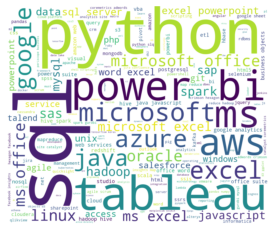

In [29]:
#Create WordCloud
wordcloud2 = WordCloud(stopwords=stopwords, width=1200, height=1000,collocation_threshold= 100, background_color="white").generate(text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
#Saving the WordCloud
#wordcloud2.to_file('wordcloud files/specskills_100colloc.png')

### Generating Word Count files - preparation for main EDA

Here we get the word count of the most commonly mentioned keywords under each specific custom tag. 
We also get bigrams (most commonly mentioned consecutive two words) and trigrams (consecutive three words) which may fit better in certain categories such as GEN_SKILL. Data obtained here will be used later on during the creation of the main bar/pie graphs depicting the most commonly mentioned keywords.

In [30]:
modified_punctuation = '!"&\'()*,-./:;<=>?@[\\]^_`{|}~' #removed #, $ and + from the punctuation list

In [31]:
wordlist = []
for x in df['Data Skills - Specific']:
    try:
        x = x.translate(str.maketrans('','',modified_punctuation)) #remove punctuation
        x = x.split(" ") #tokenize by splitting into words
        for y in x:
            wordlist.append(y) #append each word to wordlist 
    except:
        pass

In [32]:
len(wordlist)

9071

In [33]:
#make the text lowercase to prevent recording sql and SQL as unique skills
for i in range(0,len(wordlist)):
    wordlist[i] = wordlist[i].lower()

In [34]:
wordlist[0:10]

['spark',
 'r',
 'python',
 'scala',
 'google',
 'cloud',
 'platform',
 'bigquery',
 'java',
 'python']

In [35]:
#NLTK WordCount
wordcounts = nltk.FreqDist(wordlist)
#Get Most Common Words
print(wordcounts.most_common(100))

[('sql', 535), ('excel', 388), ('python', 336), ('ms', 312), ('microsoft', 298), ('office', 227), ('r', 190), ('power', 180), ('bi', 172), ('tableau', 167), ('google', 153), ('aws', 129), ('java', 127), ('hadoop', 120), ('spark', 114), ('azure', 109), ('', 109), ('powerpoint', 99), ('javascript', 96), ('word', 96), ('oracle', 95), ('linux', 91), ('hive', 88), ('mysql', 82), ('sas', 81), ('data', 73), ('server', 71), ('sap', 66), ('analytics', 65), ('services', 61), ('amazon', 55), ('agile', 53), ('suite', 52), ('unix', 46), ('c++', 45), ('c', 43), ('cloud', 42), ('access', 42), ('salesforce', 41), ('php', 40), ('talend', 38), ('windows', 37), ('git', 37), ('nosql', 36), ('web', 35), ('mapreduce', 35), ('business', 35), ('objects', 35), ('visual', 35), ('scala', 32), ('studio', 32), ('etl', 32), ('pandas', 31), ('html', 30), ('vba', 30), ('jira', 30), ('redshift', 30), ('powerbi', 29), ('365', 29), ('scrum', 28), ('scripting', 28), ('postgresql', 27), ('html5', 25), ('css', 25), ('hbase

In [36]:
#convert to pandas df
df_commonwords = pd.DataFrame(wordcounts.most_common(100), columns=['Word','Count'])

In [37]:
df_commonwords

Word  Count
0          sql    535
1        excel    388
2       python    336
3           ms    312
4    microsoft    298
..         ...    ...
95    platform     15
96  powershell     15
97    qlikview     15
98  quicksight     15
99      vmware     15

[100 rows x 2 columns]

In [38]:
#Generating freq count of Bigrams using Counter
from collections import Counter
from nltk.util import ngrams 

n_gram = 2
bigram_count = Counter(ngrams(wordlist, n_gram))
bigram_count.most_common(50)

[(('power', 'bi'), 150),
 (('microsoft', 'office'), 96),
 (('ms', 'office'), 94),
 (('ms', 'excel'), 89),
 (('microsoft', 'excel'), 80),
 (('r', 'python'), 72),
 (('excel', 'powerpoint'), 58),
 (('sql', 'server'), 55),
 (('python', 'r'), 52),
 (('sql', 'python'), 49),
 (('word', 'excel'), 49),
 (('sql', 'sql'), 40),
 (('google', 'analytics'), 36),
 (('business', 'objects'), 35),
 (('excel', 'ms'), 34),
 (('excel', 'sql'), 33),
 (('office', 'excel'), 33),
 (('web', 'services'), 32),
 (('hadoop', 'hive'), 32),
 (('amazon', 'web'), 31),
 (('ms', 'sql'), 31),
 (('python', 'sql'), 29),
 (('office', 'word'), 29),
 (('java', 'javascript'), 27),
 (('hive', 'spark'), 27),
 (('office', 'suite'), 25),
 (('sql', 'r'), 24),
 (('bi', 'sql'), 23),
 (('excel', 'google'), 23),
 (('ms', 'access'), 23),
 (('sql', 'ms'), 23),
 (('', ''), 22),
 (('tableau', 'sql'), 21),
 (('r', 'sql'), 21),
 (('c', 'c++'), 21),
 (('java', 'python'), 20),
 (('microsoft', 'power'), 20),
 (('office', '365'), 20),
 (('python',

In [39]:
df_bigram = pd.DataFrame.from_records(bigram_count.most_common(100), columns=['bigrams','count'])

In [40]:
df_bigram

bigrams  count
0           (power, bi)    150
1   (microsoft, office)     96
2          (ms, office)     94
3           (ms, excel)     89
4    (microsoft, excel)     80
..                  ...    ...
95     (tableau, excel)     12
96   (powerpoint, word)     12
97           (sql, sap)     12
98        (linux, unix)     12
99   (jira, confluence)     12

[100 rows x 2 columns]

In [41]:
#Generating freq count of Trigrams using Counter
from collections import Counter
from nltk.util import ngrams 

n_gram = 3
trigram_count = Counter(ngrams(wordlist, n_gram))
trigram_count.most_common(50)

[(('amazon', 'web', 'services'), 31),
 (('hadoop', 'hive', 'spark'), 23),
 (('word', 'excel', 'powerpoint'), 23),
 (('power', 'bi', 'sql'), 20),
 (('ms', 'excel', 'ms'), 20),
 (('microsoft', 'power', 'bi'), 18),
 (('tableau', 'power', 'bi'), 18),
 (('office', 'word', 'excel'), 18),
 (('sql', 'sql', 'server'), 17),
 (('ms', 'office', 'excel'), 17),
 (('power', 'bi', 'ms'), 17),
 (('r', 'python', 'slq'), 16),
 (('c++', 'java', 'javascript'), 16),
 (('microsoft', 'office', 'word'), 16),
 (('power', 'bi', 'tableau'), 16),
 (('microsoft', 'office', 'excel'), 15),
 (('c', 'c++', 'java'), 14),
 (('google', 'analytics', 'site'), 14),
 (('analytics', 'site', 'catalyst'), 14),
 (('site', 'catalyst', 'coremetrics'), 14),
 (('catalyst', 'coremetrics', 'adwords'), 14),
 (('coremetrics', 'adwords', 'crimson'), 14),
 (('adwords', 'crimson', 'hexagon'), 14),
 (('crimson', 'hexagon', 'facebook'), 14),
 (('hexagon', 'facebook', 'insights'), 14),
 (('facebook', 'insights', 'mapreduce'), 14),
 (('insights

In [42]:
df_trigram = pd.DataFrame.from_records(trigram_count.most_common(100), columns=['trigrams','count'])

In [43]:
df_trigram

trigrams  count
0     (amazon, web, services)     31
1       (hadoop, hive, spark)     23
2   (word, excel, powerpoint)     23
3            (power, bi, sql)     20
4             (ms, excel, ms)     20
..                        ...    ...
95   (certificates, agile, r)      7
96              (agile, r, c)      7
97               (r, c, java)      7
98          (c, java, python)      7
99    (java, python, mongodb)      7

[100 rows x 2 columns]

In [509]:
#Saving output to csv files
#df_commonwords.to_csv('spec_skills_commonwords_PH.csv', index=False)

In [317]:
#df_bigram.to_csv('spec_skills_bigrams_PH.csv', index=False)

In [318]:
#df_trigram.to_csv('spec_skills_trigrams_PH.csv', index=False)

# Main EDA Plots

## Keyword Frequency Plots

## DEGREE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#DEGREE PLOTS
df = pd.read_csv('wordcount files/degree_commonwordsb.csv')

In [3]:
df = df[:10]

In [4]:
df

Word  Count
0        Computer Science   1500
1             Engineering   1077
2              Statistics    693
3             Mathematics    650
4  Information Technology    491
5                Business    329
6               Economics    241
7              Management    204
8                 Finance    200
9                 Physics    109

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    10 non-null     object
 1   Count   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


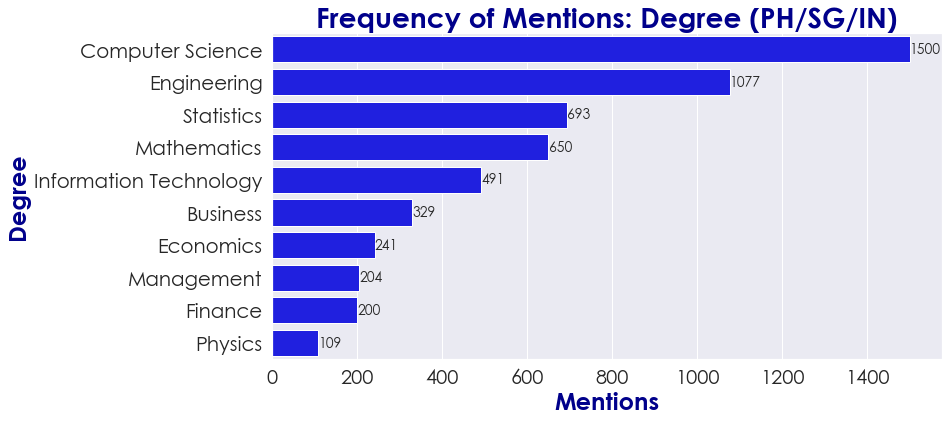

In [12]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Count',y='Word',data=df,color='blue')
for p in ax.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=14)  #font size of label
plt.title('Frequency of Mentions: Degree (PH/SG/IN)', fontsize=28, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xlabel('Mentions', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Degree', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xticks(fontsize=20, fontname='Century Gothic')
plt.yticks(fontsize=20, fontname='Century Gothic')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [25]:
#PER COUNTRY: DEGREE

df_degree_PH = pd.read_csv('wordcount files/degree_commonwords_PHb.csv')
df_degree_SG = pd.read_csv('wordcount files/degree_commonwords_SGb.csv')
df_degree_IN = pd.read_csv('wordcount files/degree_commonwords_INb.csv')

In [26]:
df_degree_PH

Word  Count
0        Computer Science    463
1             Engineering    360
2  Information Technology    212
3              Statistics    204
4             Mathematics    191

In [27]:
df_degree_SG

Word  Count
0        Computer Science    695
1             Engineering    483
2              Statistics    377
3             Mathematics    340
4  Information Technology    194

In [28]:
df_degree_IN

Word  Count
0        Computer Science    342
1             Engineering    234
2  Information Technology    181
3             Mathematics    119
4              Statistics    112

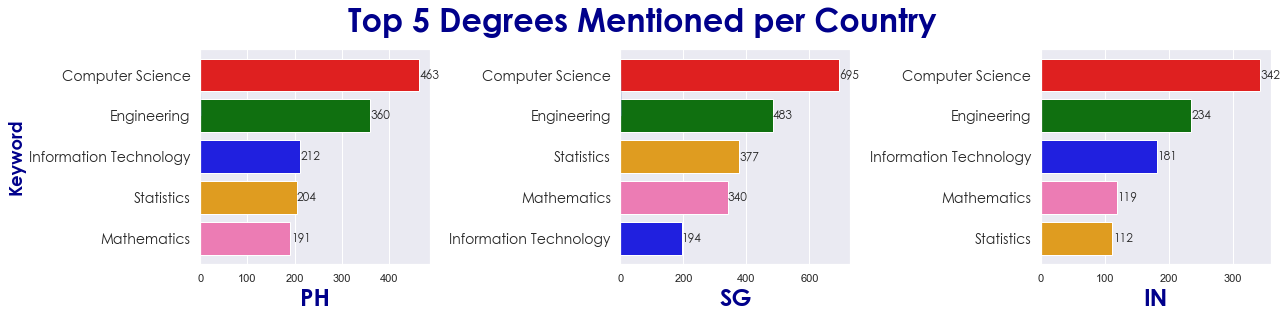

In [36]:
#BY COUNTRY: DEGREE

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 1x3 sub plots
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(18,4))

clrs1 = ['red','green','blue','orange','hotpink']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='Count',y='Word',data=df_degree_PH,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('PH', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['red','green','orange','hotpink', 'blue']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='Count',y='Word',data=df_degree_SG, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('SG', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red','green','blue','hotpink','orange']
ax3 = fig.add_subplot(gs[0, 2]) # row 0, col 2
ax3 = sns.barplot(x='Count',y='Word',data=df_degree_IN, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('IN', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

st = plt.suptitle("Top 5 Degrees Mentioned per Country", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('top5degreecountryplots.png', dpi=300, bbox_inches='tight') #saving to file

###### Findings:

 All countries look for the same degrees (STEM) most of the time with minor differences in the order.

In [60]:
#see all fonts available in your computer
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

## GEN SKILLS

In [13]:
#GEN SKILLS:
df = pd.read_csv('wordcount files/gen_skills_bigramsb.csv')

In [14]:
df = df[:10]

In [15]:
df

bigrams  count
0       ('machine', 'learning')   1013
1          ('data', 'analysis')    489
2               ('big', 'data')    450
3            ('data', 'mining')    406
4  ('business', 'intelligence')    351
5     ('data', 'visualization')    345
6         ('data', 'analytics')    303
7         ('data', 'warehouse')    222
8   ('statistical', 'analysis')    188
9          ('deep', 'learning')    184

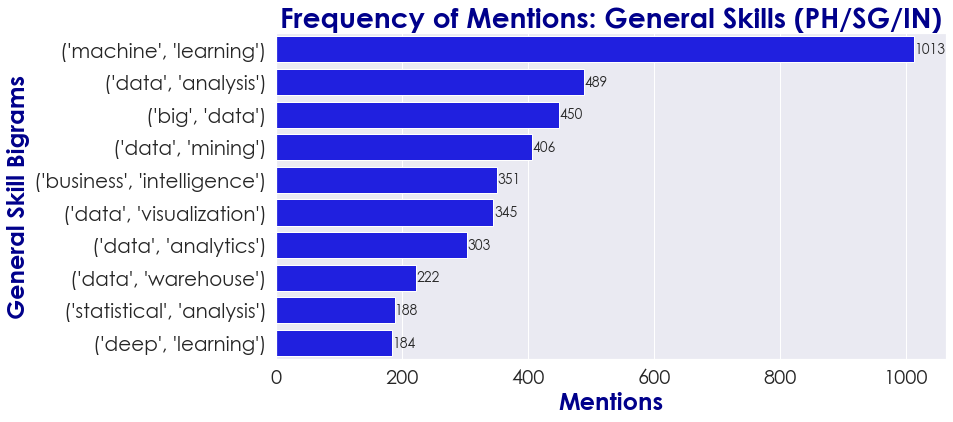

In [16]:
#OVERALL MENTIONS: GEN SKILLS
f, ax = plt.subplots(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='count',y='bigrams',data=df,color='blue')
for p in ax.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=14)  #font size of label
plt.title('Frequency of Mentions: General Skills (PH/SG/IN)', fontsize=28, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xlabel('Mentions', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('General Skill Bigrams', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xticks(fontsize=20, fontname='Century Gothic')
plt.yticks(fontsize=20, fontname='Century Gothic')
#plt.savefig('genskillsoverall_plot.png', dpi=300, bbox_inches='tight') #saving to file

In [46]:
#GEN SKILLS: BY COUNTRY
df_gen_skills_PH = pd.read_csv('wordcount files/gen_skills_bigrams_PHb.csv')
df_gen_skills_SG = pd.read_csv('wordcount files/gen_skills_bigrams_SGb.csv')
df_gen_skills_IN = pd.read_csv('wordcount files/gen_skills_bigrams_INb.csv')

In [47]:
df_gen_skills_PH

bigrams  count
0       ('machine', 'learning')    182
1          ('data', 'analysis')    151
2  ('business', 'intelligence')    114
3            ('data', 'mining')    106
4     ('data', 'visualization')     94
5         ('data', 'analytics')     78
6               ('big', 'data')     76
7         ('data', 'warehouse')     62
8   ('statistical', 'analysis')     55
9        ('data', 'collection')     52

In [48]:
df_gen_skills_SG

bigrams  count
0         ('machine', 'learning')    678
1                 ('big', 'data')    284
2            ('data', 'analysis')    272
3              ('data', 'mining')    235
4       ('data', 'visualization')    176
5           ('data', 'analytics')    174
6            ('deep', 'learning')    162
7    ('business', 'intelligence')    136
8  ('artificial', 'intelligence')    120
9          ('data', 'processing')    103

In [49]:
df_gen_skills_IN

bigrams  count
0       ('machine', 'learning')    153
1  ('business', 'intelligence')    101
2               ('big', 'data')     90
3     ('data', 'visualization')     75
4          ('data', 'analysis')     66
5            ('data', 'mining')     65
6         ('data', 'warehouse')     61
7         ('data', 'analytics')     51
8   ('programming', 'language')     39
9   ('software', 'development')     38

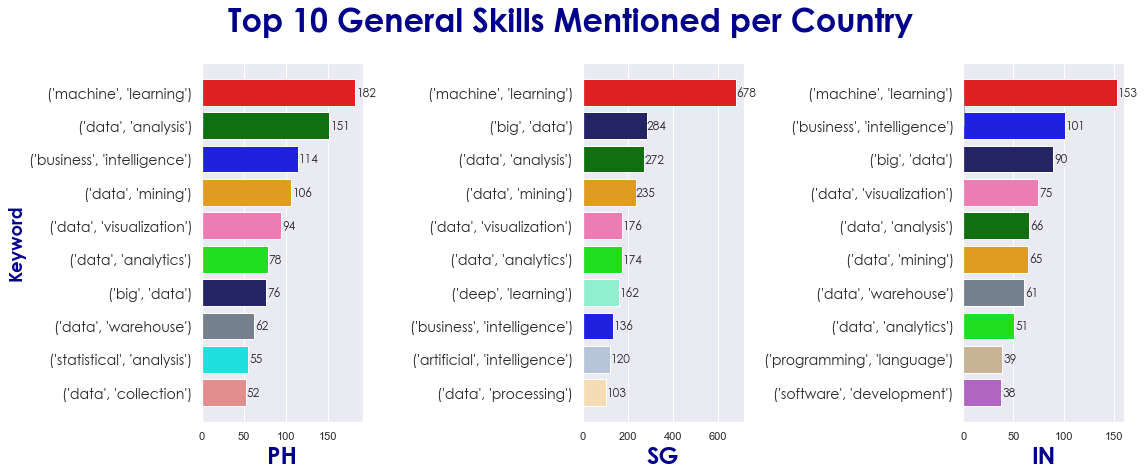

In [52]:
#GEN SKILLS: BY COUNTRY

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 1x3 sub plots
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16,6))

clrs1 = ['red','green','blue','orange','hotpink','lime','midnightblue','slategrey','cyan', 'lightcoral']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_PH,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('PH', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['red','midnightblue','green','orange','hotpink','lime','aquamarine', 'blue','lightsteelblue', 'navajowhite']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_SG, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('SG', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red','blue','midnightblue','hotpink','green','orange','slategrey','lime','tan', 'mediumorchid']
ax3 = fig.add_subplot(gs[0, 2]) # row 0, col 2
ax3 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_IN, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('IN', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

st = plt.suptitle("Top 10 General Skills Mentioned per Country", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspec_genskillcountryplots.png', dpi=300, bbox_inches='tight') #saving to file

In [53]:
#GEN SKILLS: BY JOB SEARCH TERM

df_gen_skills_DataScientist = pd.read_csv('wordcount files/gen_skills_bigrams_DataScientistb.csv')
df_gen_skills_DataAnalyst = pd.read_csv('wordcount files/gen_skills_bigrams_DataAnalystb.csv')
df_gen_skills_DataEngineer = pd.read_csv('wordcount files/gen_skills_bigrams_DataEngineerb.csv')
df_gen_skills_BusinessIntelligence = pd.read_csv('wordcount files/gen_skills_bigrams_BusinessIntelligenceb.csv')

In [54]:
df_gen_skills_DataScientist

bigrams  count
0       ('machine', 'learning')    875
1            ('data', 'mining')    302
2               ('big', 'data')    302
3          ('data', 'analysis')    294
4     ('data', 'visualization')    232
5         ('data', 'analytics')    194
6          ('deep', 'learning')    167
7   ('statistical', 'analysis')    147
8  ('business', 'intelligence')    147
9           ('data', 'science')    132

In [55]:
df_gen_skills_DataAnalyst

bigrams  count
0          ('data', 'analysis')    109
1     ('data', 'visualization')     71
2         ('data', 'analytics')     67
3       ('machine', 'learning')     51
4            ('data', 'mining')     49
5  ('business', 'intelligence')     45
6        ('data', 'collection')     31
7     ('project', 'management')     26
8               ('big', 'data')     25
9         ('data', 'warehouse')     24

In [56]:
df_gen_skills_DataEngineer

bigrams  count
0              ('big', 'data')     83
1      ('machine', 'learning')     54
2        ('data', 'warehouse')     53
3  ('software', 'development')     34
4       ('data', 'processing')     34
5         ('data', 'analysis')     32
6      ('data', 'engineering')     31
7      ('data', 'warehousing')     27
8           ('data', 'mining')     27
9        ('data', 'pipelines')     26

In [57]:
df_gen_skills_BusinessIntelligence

bigrams  count
0    ('business', 'intelligence')    143
1            ('data', 'analysis')     54
2           ('data', 'warehouse')     45
3                 ('big', 'data')     40
4       ('project', 'management')     40
5        ('intelligence', 'data')     36
6         ('machine', 'learning')     33
7       ('data', 'visualization')     30
8  ('artificial', 'intelligence')     29
9              ('data', 'mining')     28

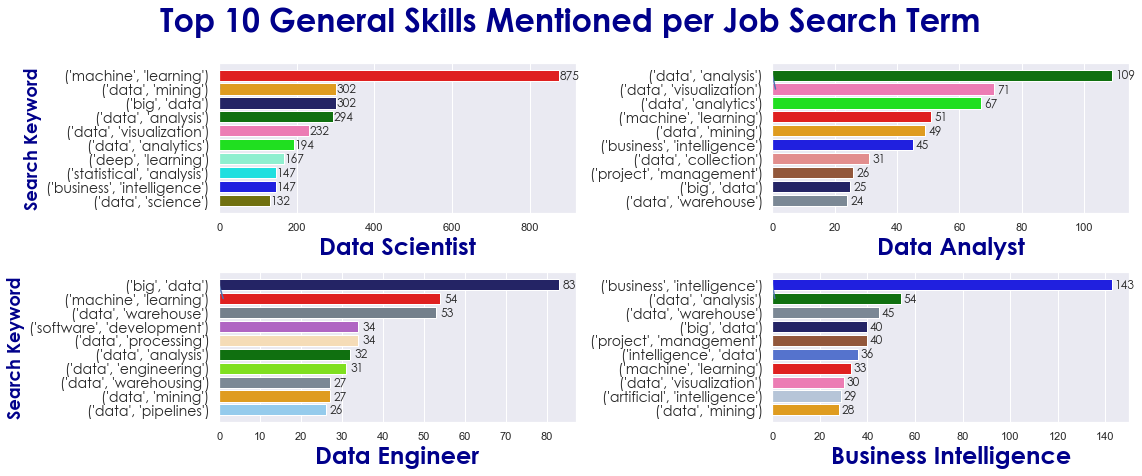

In [60]:
#BY JOB POSITION SEARCH TERM (GEN SKILL)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 2x2 sub plots
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(16,6))

clrs1 = ['red','orange','midnightblue','green','hotpink','lime','aquamarine','cyan','blue','olive']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_DataScientist,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Scientist', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Search Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['green','hotpink','lime','red','orange','blue','lightcoral','sienna','midnightblue','lightslategrey']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_DataAnalyst, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Analyst', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['midnightblue','red','slategrey','mediumorchid','navajowhite','green','chartreuse','lightslategrey','orange','lightskyblue']
ax3 = fig.add_subplot(gs[1, 0]) # row 0, col 2
ax3 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_DataEngineer, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Engineer', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Search Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

clrs4 = ['blue','green','lightslategrey','midnightblue','sienna','royalblue','red','hotpink','lightsteelblue','orange']
ax4 = fig.add_subplot(gs[1, 1]) # row 0, col 2
ax4 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_BusinessIntelligence, palette=clrs4)
for p in ax4.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax4.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Business Intelligence', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax4.plot([0,1])

st = plt.suptitle("Top 10 General Skills Mentioned per Job Search Term", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspecplots_genskills_jobterm.png', dpi=300, bbox_inches='tight') #saving to file

In [96]:
#GEN SKILLS: BY INDUSTRY (TOP 4) 

df_gen_skills_InformationTechnologyServices = pd.read_csv('wordcount files/gen_skills_bigrams_InformationTechnology&Servicesb.csv')
df_gen_skills_ProfessionalServices = pd.read_csv('wordcount files/gen_skills_bigrams_ProfessionalServicesb.csv')
df_gen_skills_BankingFinanceInsurance = pd.read_csv('wordcount files/gen_skills_bigrams_BankingFinance&Insuranceb.csv')
df_gen_skills_ConsumerRetail = pd.read_csv('wordcount files/gen_skills_bigrams_ConsumerRetailb.csv')

In [98]:
#trim to Top 5
df_gen_skills_InformationTechnologyServices = df_gen_skills_InformationTechnologyServices[:5]
df_gen_skills_ProfessionalServices = df_gen_skills_ProfessionalServices[:5]
df_gen_skills_BankingFinanceInsurance = df_gen_skills_BankingFinanceInsurance[:5]
df_gen_skills_ConsumerRetail = df_gen_skills_ConsumerRetail[:5]

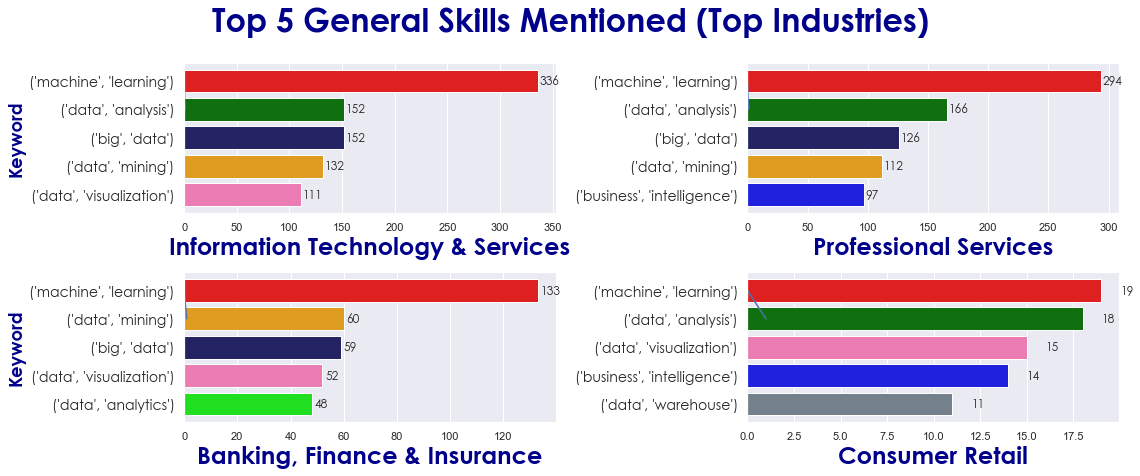

In [104]:
#BY INDUSTRY (GEN SKILL)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 2x2 sub plots
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(16,6))

clrs1 = ['red','green','midnightblue','orange','hotpink']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_InformationTechnologyServices,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Information Technology & Services', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['red','green','midnightblue','orange','blue']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_ProfessionalServices, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Professional Services', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red','orange','midnightblue','hotpink','lime']
ax3 = fig.add_subplot(gs[1, 0]) # row 0, col 2
ax3 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_BankingFinanceInsurance, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Banking, Finance & Insurance', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

clrs4 = ['red','green','hotpink','blue','slategrey']
ax4 = fig.add_subplot(gs[1, 1]) # row 0, col 2
ax4 = sns.barplot(x='count',y='bigrams',data=df_gen_skills_ConsumerRetail, palette=clrs4)
for p in ax4.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax4.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Consumer Retail', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax4.plot([0,1])

st = plt.suptitle("Top 5 General Skills Mentioned (Top Industries)", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspecplots_genskills_top5_industry.png', dpi=300, bbox_inches='tight') #saving to file

###### Findings:
Per Country: 

Looking at general skills, we notice that there is a similar trend for the Top 5 list of each country. Machine Learning tops the list for everyone, while skills such as Big Data, Data Analysis, Data Mining, Data Visualization and Business Intelligence can also be observed. As to what unique keywords can be found for each country, the Philippines looks at Statistical Analysis and Data Collection, Singapore focuses on Deep Learning & AI, while Indonesia emphasizes Programming Language and Software Development.

Per Industry:

The Top 3 Industries (IT & Services; Professional Services; Banking, Finance & Insurance) share similar top sought skills in the form of machine learning, data mining and big data, while Consumer Retail tends to prioritize data visualization and business intelligence more.

In [ ]:
#GEN SKILL COLOR GUIDE:
['blue','green','lightslategrey','midnightblue','sienna','royalblue','red','hotpink','lightsteelblue','orange']
#machine learning = red
#data analysis = green
#business intelligence = blue
#data mining = orange
#data visualization = hotpink
#data analytics = lime
#big data = midnightblue
#data warehouse = slategrey
#statistical analysis = cyan
#deep learning = aquamarine
#artificial intelligence = lightsteelblue
#programming language = tan
#data collection = lightcoral

#project management = sienna
#software development = mediumorchid
#data processing = navajowhite
#data engineering = chartreuse
#data warehousing = lightslategrey
#data pipelines = lightskyblue
#intelligence data = royalblue
#artificial intelligence = khaki
#data science = olive

## SPEC SKILLS (TOOLS & TECHNOGIES)

In [17]:
#SPEC SKILLS:
df = pd.read_csv('wordcount files/spec_skills_commonwords.csv')

In [18]:
df = df[:10]

In [19]:
df

Word  Count
0        sql   1697
1     python   1459
2          r    784
3      excel    762
4    tableau    624
5         ms    577
6       java    565
7  microsoft    543
8      spark    530
9     hadoop    523

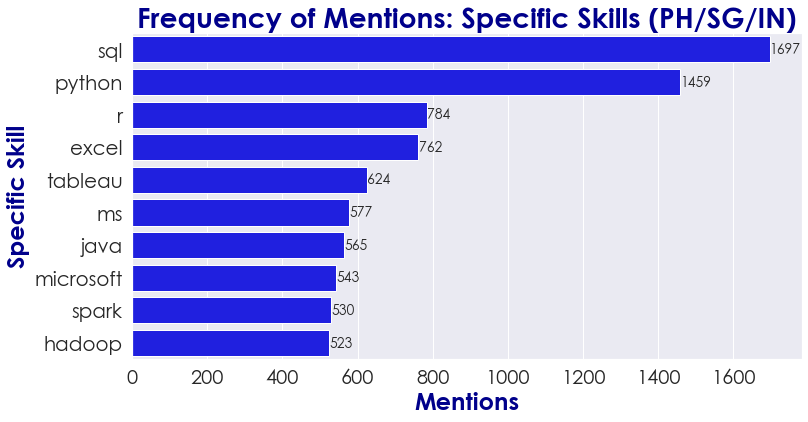

In [20]:
#OVERALL MENTIONS: SPEC SKILLS
f, ax = plt.subplots(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Count',y='Word',data=df,color='blue')
for p in ax.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=14)  #font size of label
plt.title('Frequency of Mentions: Specific Skills (PH/SG/IN)', fontsize=28, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xlabel('Mentions', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Specific Skill', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.xticks(fontsize=20, fontname='Century Gothic')
plt.yticks(fontsize=20, fontname='Century Gothic')
#plt.savefig('specskillsoverall_plot.png', dpi=300, bbox_inches='tight') #saving to file

In [71]:
#SPEC SKILLS: BY COUNTRY
df_spec_skills_PH = pd.read_csv('wordcount files/spec_skills_commonwords_PHb.csv')
df_spec_skills_SG = pd.read_csv('wordcount files/spec_skills_commonwords_SGb.csv')
df_spec_skills_IN = pd.read_csv('wordcount files/spec_skills_commonwords_INb.csv')

In [72]:
df_spec_skills_PH

Word  Count
0        sql    535
1      excel    388
2     python    336
3         ms    312
4  microsoft    298
5     office    227
6          r    190
7      power    180
8         bi    172
9    tableau    167

In [73]:
df_spec_skills_SG

Word  Count
0   python    852
1      sql    759
2        r    464
3  tableau    348
4    spark    341
5   hadoop    322
6     java    272
7    excel    209
8     hive    173
9      aws    159

In [74]:
df_spec_skills_IN

Word  Count
0        sql    403
1     python    271
2       java    166
3      excel    165
4          r    130
5    tableau    109
6         ms    109
7      linux    101
8      mysql     91
9  microsoft     90

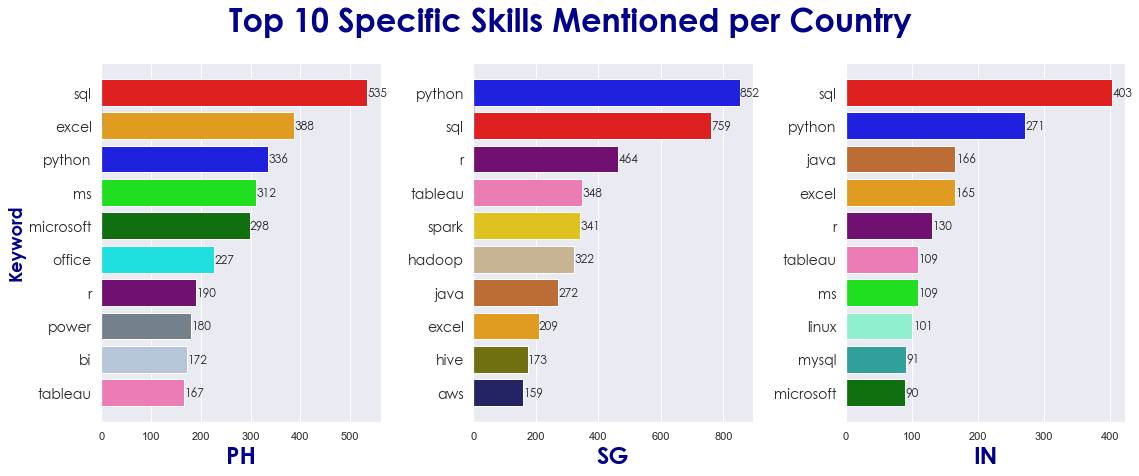

In [78]:
#SPEC SKILLS: BY COUNTRY

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 1x3 sub plots
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16,6))

clrs1 = ['red','orange','blue','lime','green','cyan','purple','slategrey','lightsteelblue','hotpink']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='Count',y='Word',data=df_spec_skills_PH,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('PH', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['blue','red','purple','hotpink','gold','tan','chocolate','orange','olive','midnightblue']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='Count',y='Word',data=df_spec_skills_SG, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('SG', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red','blue','chocolate','orange','purple','hotpink','lime','aquamarine','lightseagreen','green']
ax3 = fig.add_subplot(gs[0, 2]) # row 0, col 2
ax3 = sns.barplot(x='Count',y='Word',data=df_spec_skills_IN, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('IN', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

st = plt.suptitle("Top 10 Specific Skills Mentioned per Country", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspec_specskillcountryplots.png', dpi=300, bbox_inches='tight') #saving to file

In [317]:
#SPEC SKILLS: BY JOB SEARCH TERM
df_spec_skills_DataScientist = pd.read_csv('wordcount files/spec_skills_commonwords_DataScientistb.csv')
df_spec_skills_DataAnalyst = pd.read_csv('wordcount files/spec_skills_commonwords_DataAnalystb.csv')
df_spec_skills_DataEngineer = pd.read_csv('wordcount files/spec_skills_commonwords_DataEngineerb.csv')
df_spec_skills_BusinessIntelligence = pd.read_csv('wordcount files/spec_skills_commonwords_BusinessIntelligenceb.csv')

In [318]:
df_spec_skills_DataScientist

Word  Count
0   python   1084
1      sql    994
2        r    618
3    spark    405
4   hadoop    367
5     java    354
6  tableau    340
7    excel    331
8       ms    257
9      aws    246

In [319]:
df_spec_skills_DataAnalyst

Word  Count
0        sql    309
1      excel    254
2         ms    181
3    tableau    151
4     python    139
5  microsoft    122
6      power    100
7     office     94
8         bi     94
9          r     91

In [320]:
df_spec_skills_DataEngineer

Word  Count
0        sql    187
1     python    168
2       java    128
3      linux    102
4     hadoop     93
5  microsoft     90
6      spark     79
7        aws     73
8      azure     68
9     office     61

In [321]:
df_spec_skills_BusinessIntelligence

Word  Count
0         sql    207
1       excel    137
2   microsoft    107
3     tableau     98
4          ms     90
5          bi     76
6      office     74
7      python     68
8       power     65
9  powerpoint     55

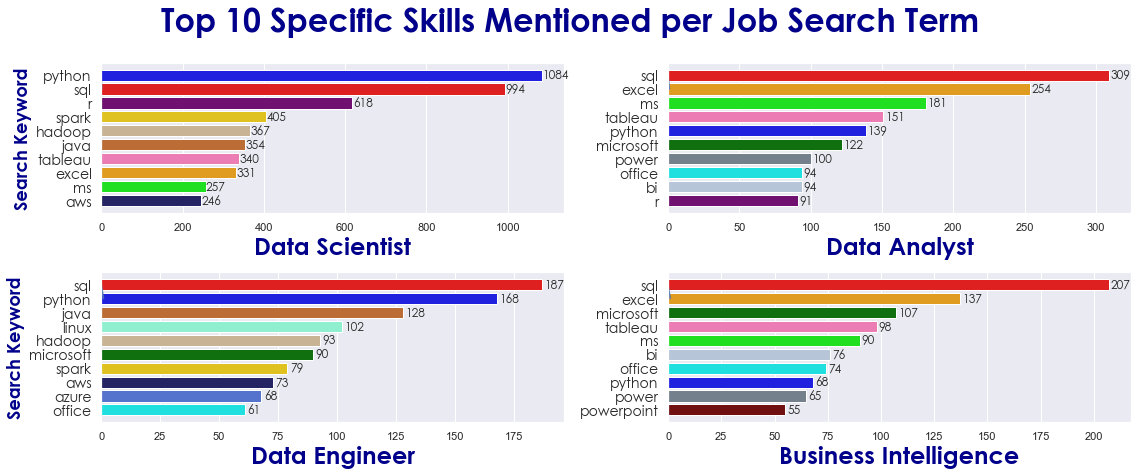

In [325]:
#BY JOB POSITION SEARCH TERM

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 2x2 sub plots
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(16,6))

clrs1 = ['blue','red','purple','gold','tan','chocolate', 'hotpink','orange','lime','midnightblue']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='Count',y='Word',data=df_spec_skills_DataScientist,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Scientist', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Search Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['red','orange','lime','hotpink','blue','green','slategrey','cyan','lightsteelblue','purple']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='Count',y='Word',data=df_spec_skills_DataAnalyst, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Analyst', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red' ,'blue', 'chocolate', 'aquamarine', 'tan', 'green', 'gold', 'midnightblue', 'royalblue', 'cyan']
ax3 = fig.add_subplot(gs[1, 0]) # row 0, col 2
ax3 = sns.barplot(x='Count',y='Word',data=df_spec_skills_DataEngineer, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Data Engineer', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Search Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

clrs4 = ['red', 'orange', 'green', 'hotpink', 'lime', 'lightsteelblue', 'cyan', 'blue', 'slategrey', 'maroon']
ax4 = fig.add_subplot(gs[1, 1]) # row 0, col 2
ax4 = sns.barplot(x='Count',y='Word',data=df_spec_skills_BusinessIntelligence, palette=clrs4)
for p in ax4.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax4.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Business Intelligence', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax4.plot([0,1])

st = plt.suptitle("Top 10 Specific Skills Mentioned per Job Search Term", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspecplots.png', dpi=300, bbox_inches='tight') #saving to file

In [189]:
#SPEC SKILLS: BY INDUSTRY (TOP 4)
df_spec_skills_InformationTechnologyServices = pd.read_csv('wordcount files/spec_skills_commonwords_InformationTechnology&Servicesb.csv')
df_spec_skills_ProfessionalServices = pd.read_csv('wordcount files/spec_skills_commonwords_ProfessionalServicesb.csv')
df_spec_skills_BankingFinanceInsurance = pd.read_csv('wordcount files/spec_skills_commonwords_BankingFinance&Insuranceb.csv')
df_spec_skills_ConsumerRetail = pd.read_csv('wordcount files/spec_skills_commonwords_ConsumerRetailb.csv')

In [190]:
df_spec_skills_InformationTechnologyServices

Word  Count
0        sql    591
1     python    501
2       java    249
3          r    219
4      spark    217
5     hadoop    204
6    tableau    193
7      excel    178
8      linux    165
9  microsoft    165

In [191]:
df_spec_skills_ProfessionalServices

Word  Count
0        sql    510
1     python    425
2      excel    279
3          r    246
4         ms    222
5  microsoft    195
6    tableau    180
7      power    146
8         bi    145
9     google    132

In [192]:
df_spec_skills_BankingFinanceInsurance

Word  Count
0      sql    194
1   python    175
2        r    107
3   hadoop     78
4    excel     73
5  tableau     72
6    spark     71
7       ms     62
8     java     60
9   office     48

In [193]:
df_spec_skills_ConsumerRetail

Word  Count
0      excel     46
1        sql     45
2     python     35
3  microsoft     31
4     office     25
5    tableau     22
6          r     18
7        aws     17
8     google     14
9      power     13

In [194]:
#trim to top 5
df_spec_skills_InformationTechnologyServices = df_spec_skills_InformationTechnologyServices[0:5]
df_spec_skills_ProfessionalServices = df_spec_skills_ProfessionalServices[0:5]
df_spec_skills_BankingFinanceInsurance = df_spec_skills_BankingFinanceInsurance[0:5]
df_spec_skills_ConsumerRetail = df_spec_skills_ConsumerRetail[0:5]

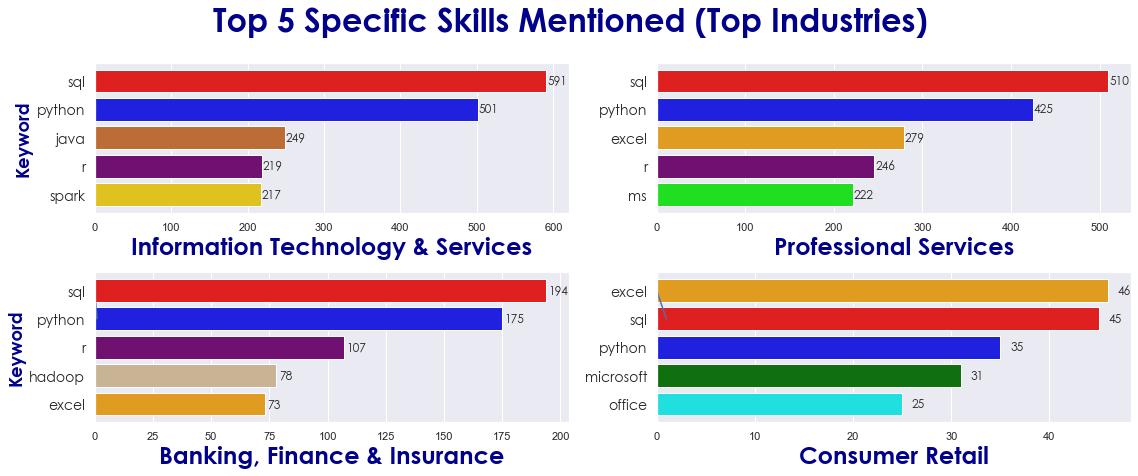

In [197]:
#BY INDUSTRY (SPEC SKILL)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create 2x2 sub plots
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(16,6))

clrs1 = ['red','blue','chocolate','purple','gold']
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.barplot(x='Count',y='Word',data=df_spec_skills_InformationTechnologyServices,palette=clrs1)
for p in ax1.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax1.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Information Technology & Services', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax1.plot([0,1])

clrs2 = ['red','blue','orange','purple','lime']
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.barplot(x='Count',y='Word',data=df_spec_skills_ProfessionalServices, palette=clrs2)
for p in ax2.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax2.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Professional Services', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax2.plot([0,1])

clrs3 = ['red','blue', 'purple', 'tan','orange']
ax3 = fig.add_subplot(gs[1, 0]) # row 0, col 2
ax3 = sns.barplot(x='Count',y='Word',data=df_spec_skills_BankingFinanceInsurance, palette=clrs3)
for p in ax3.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax3.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Banking, Finance & Insurance', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('Keyword', fontsize=18, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax3.plot([0,1])

clrs4 = ['orange', 'red', 'blue', 'green', 'cyan']
ax4 = fig.add_subplot(gs[1, 1]) # row 0, col 2
ax4 = sns.barplot(x='Count',y='Word',data=df_spec_skills_ConsumerRetail, palette=clrs4)
for p in ax4.patches: #outputting value labels beside the bar graph
    width = p.get_width()    # get bar length
    ax4.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, # of decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontname='Century Gothic', #font
            fontsize=12)  #font size of label
plt.xlabel('Consumer Retail', fontsize=24, fontname='Century Gothic', color='darkblue', fontweight='bold')
plt.ylabel('')
plt.yticks(fontsize=14, fontname='Century Gothic')
ax4.plot([0,1])

st = plt.suptitle("Top 5 Specific Skills Mentioned (Top Industries)", fontsize=32, color='darkblue', fontname='Century Gothic', fontweight='bold') #gloabl title for multiple subplots
st.set_y(1.1) #adjust position of global title
#fig.subplots_adjust(top=0.85)
plt.tight_layout()
#plt.savefig('gridspecplots_specskills_top5_industry.png', dpi=300, bbox_inches='tight') #saving to file

###### Findings:
Per Country: 

We observe that SQL and Python are consistently within the top 3 for all three countries. Other common tools mentioned are Excel, R and Tableau. But which tools really set the countries apart? We can see that companies in the Philippines prioritize Microsoft products such as Excel, Office, and prefers PowerBI over Tableau for its data visualization. Singapore, meanwhile, prefers tools related to Big Data, as seen in their preference for Spark, Hadoop and Hive. Indonesia, on the other hand, ranks Java and Linux highly, which implies its focus on Software & Data Engineering related competencies.

Per Job Role:

Looking at the top skills mentioned for each job role, we noticed that Data Scientists and Data Engineers had several overlapping skills. Machine Learning & Big Data are the common themes for these skills. Meanwhile, Data Analyst and Business Intelligence roles were even more similar to each other, with Data Analysis & Data Visualization being the common themes. Python is a very important skill to have for the first group, whereas Excel is very important for the second group. SQL remains important across all data roles. As for unique keywords, Microsoft Azure, a cloud computing platform, is one such example for Data Engineer, while PowerPoint appeared prominently in the Business Intelligence roles.

Per Industry:

SQL and Python remain strong across industries. Excel is not prioritized by IT & Services, while R is not prioritized by Consumer Retail. Java is highly prioritized in IT & Services while Hadoop is highly prioritized in Banking, Finance & Insurance.

In [282]:
#Matplotlib Color List - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
#SPEC SKILL: ['red', 'orange', 'green', 'hotpink', 'lime', 'lightsteelblue', 'cyan', 'blue', 'slategrey', 'maroon']

#sql = red
#excel = orange
#python = blue
#ms = lime
#microsoft = green
#office = cyan
#r = purple
#power = slategrey
#bi = lightsteelblue
#tableau = hotpink
#java = chocolate
#spark = gold
#hadoop = tan
#hive = olive
#aws = midnightblue
#linux = aquamarine
#mysql = lightseagreen

#azure = royalblue
#powerpoint = maroon

#GEN SKILL:

#machine learning = red
#data analysis = green
#business intelligence = blue
#data mining = orange
#data visualization = hotpink
#analysis data = olive
#data analytics = lime
#big data = midnightblue
#data warehouse = slategrey
#statistical analysis = cyan
#deep learning = aquamarine
#artificial intelligence = lightsteelblue
#programming language = tan

#data collection = lightcoral
#project management = sienna
#software development = mediumorchid
#data processing = navajowhite
#data engineering = chartreuse
#data warehousing = lightslategrey
#data pipelines = lightskyblue
#intelligence data = royalblue
#artificial intelligence = khaki

## EDUCATION LEVEL

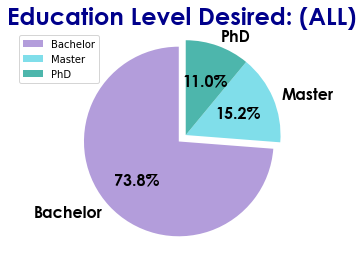

In [2]:
#PIE CHART EDUCATION_LVL
import matplotlib.pyplot as plt

labels = ['Bachelor', 'Master', 'PhD']
sizes = [1792,370,267]
colors = ['#B39DDB', '#80DEEA', '#4DB6AC']
explode = (0.1, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels)
plt.title("Education Level Desired: (ALL)", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
#plt.savefig('educlvl_piechart_ALL.png', dpi=300, bbox_inches='tight') #saving to file

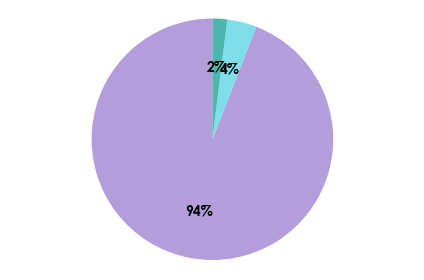

In [3]:
#PIE CHART EDUCATION_LVL - PH
labels = ['Bachelor', 'Master', 'PhD']
sizes = [811,34,17]
colors = ['#B39DDB', '#80DEEA', '#4DB6AC']
explode = (0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, tests = plt.pie(sizes, colors=colors, explode=explode, autopct='%1.0f%%', textprops={'fontsize': 14,'fontname':'Century Gothic','fontweight':'bold'}, shadow=False, startangle=90)
#plt.legend(patches, labels, loc="best", fontsize=14)
plt.axis('equal')
plt.title("", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold')
plt.tight_layout()
#plt.savefig('educlvl_piechart_PH.png', dpi=300, bbox_inches='tight') #saving to file

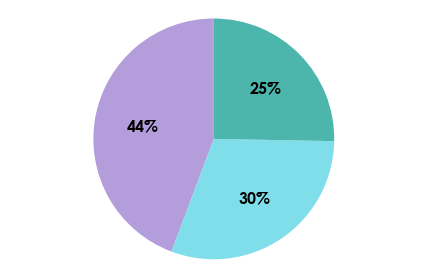

In [4]:
#PIE CHART EDUCATION_LVL - SG
labels = ['Bachelor', 'Master', 'PhD']
sizes = [406,279,232]
colors = ['#B39DDB', '#80DEEA', '#4DB6AC']
explode = (0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, tests = plt.pie(sizes, colors=colors, explode=explode, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'}, shadow=False, startangle=90)
#plt.legend(patches, labels, loc="best", fontsize=14)
plt.axis('equal')
plt.title("", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold')
plt.tight_layout()
#plt.savefig('educlvl_piechart_SG.png', dpi=300, bbox_inches='tight') #saving to file

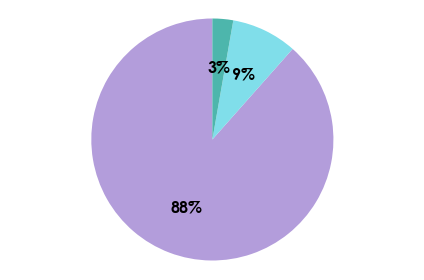

In [6]:
#PIE CHART EDUCATION_LVL - IN
labels = ['Bachelor', 'Master', 'PhD']
sizes = [575,57,18]
colors = ['#B39DDB', '#80DEEA', '#4DB6AC']
explode = (0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, tests = plt.pie(sizes, colors=colors, explode=explode, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'}, shadow=False, startangle=90)
#plt.legend(patches, labels, loc="best", fontsize=14)
plt.axis('equal')
plt.title("", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold')
plt.tight_layout()
#plt.savefig('educlvl_piechart_IN.png', dpi=300, bbox_inches='tight') #saving to file

###### Findings:

For Education Level, we see that the Philippines and Indonesia have a similar view - focusing more on Bachelor Degree graduates, whereas Singapore places a much higher importance on Master’s and PhD graduates.

## YEARS OF EXPERIENCE

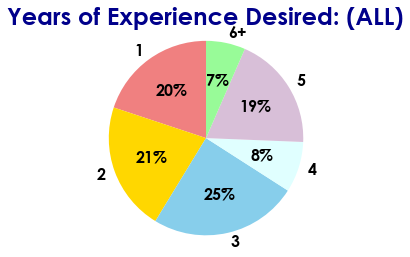

In [8]:
#PIE CHART YRS_OF_EXPERIENCE
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6+']
sizes = [420,451,520,178,403,138]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle','palegreen']
#explode = (0.0, 0.1, 0.1,0.0,0.0,0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Years of Experience Desired: (ALL)", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
#plt.savefig('yrsofexp_piechart_ALL.png', dpi=300, bbox_inches='tight') #saving to file

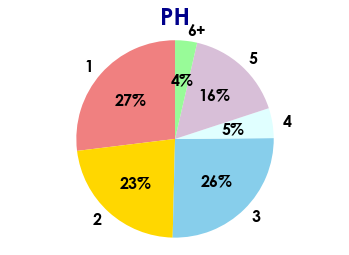

In [9]:
#PIE CHART YRS_OF_EXPERIENCE - PH
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6+']
sizes = [247,208,234,45,150,33]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle','palegreen']
#explode = (0.2, 0.0, 0.2,0.0,0.0,0.0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("PH", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
#plt.savefig('yrsofexp_piechart_PH.png', dpi=300, bbox_inches='tight') #saving to file

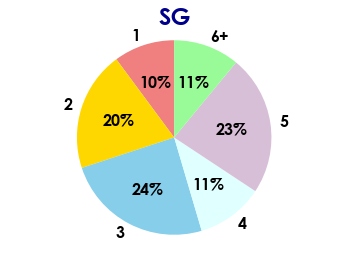

In [10]:
#PIE CHART YRS_OF_EXPERIENCE - SG
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6+']
sizes = [60,118,145,66,138,65]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle','palegreen']
#explode = (0.0, 0.0, 0.2,0.0,0.2,0.0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("SG", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
#plt.savefig('yrsofexp_piechart_SG.png', dpi=300, bbox_inches='tight') #saving to file

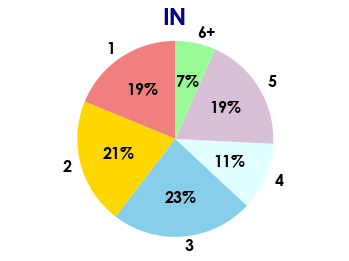

In [12]:
#PIE CHART YRS_OF_EXPERIENCE - IN
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6+']
sizes = [113,125,141,67,115,40]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle','palegreen']
#explode = (0.0, 0.2, 0.2,0.0,0.0,0.0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IN", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
#plt.savefig('yrsofexp_piechart_IN.png', dpi=300, bbox_inches='tight') #saving to file

###### Findings:

Looking at Years of Experience desired by employers, Singapore notably seeks candidates around the 3-5 year range, while companies in the Philippines have a lower requirement - around 1-3 years. Indonesia, on the other hand, has a more balanced approach for this category.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import streamlit as st
import streamlit.components.v1 as components

from datetime import date, timedelta
from IPython import get_ipython
from PIL import Image
from streamlit import caching
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import re

In [2]:
st.title('Data Science Jobs in South East Asia')

In [3]:
image = Image.open('eskwelabs.png')
st.sidebar.image(image, caption='', use_column_width=True)

In [4]:
section = st.sidebar.radio("Sections",
    ("Maps","Industry Comparison","Posting Age","Authors"))

## Location of Data-Related Jobs in Indonesia & Philippines

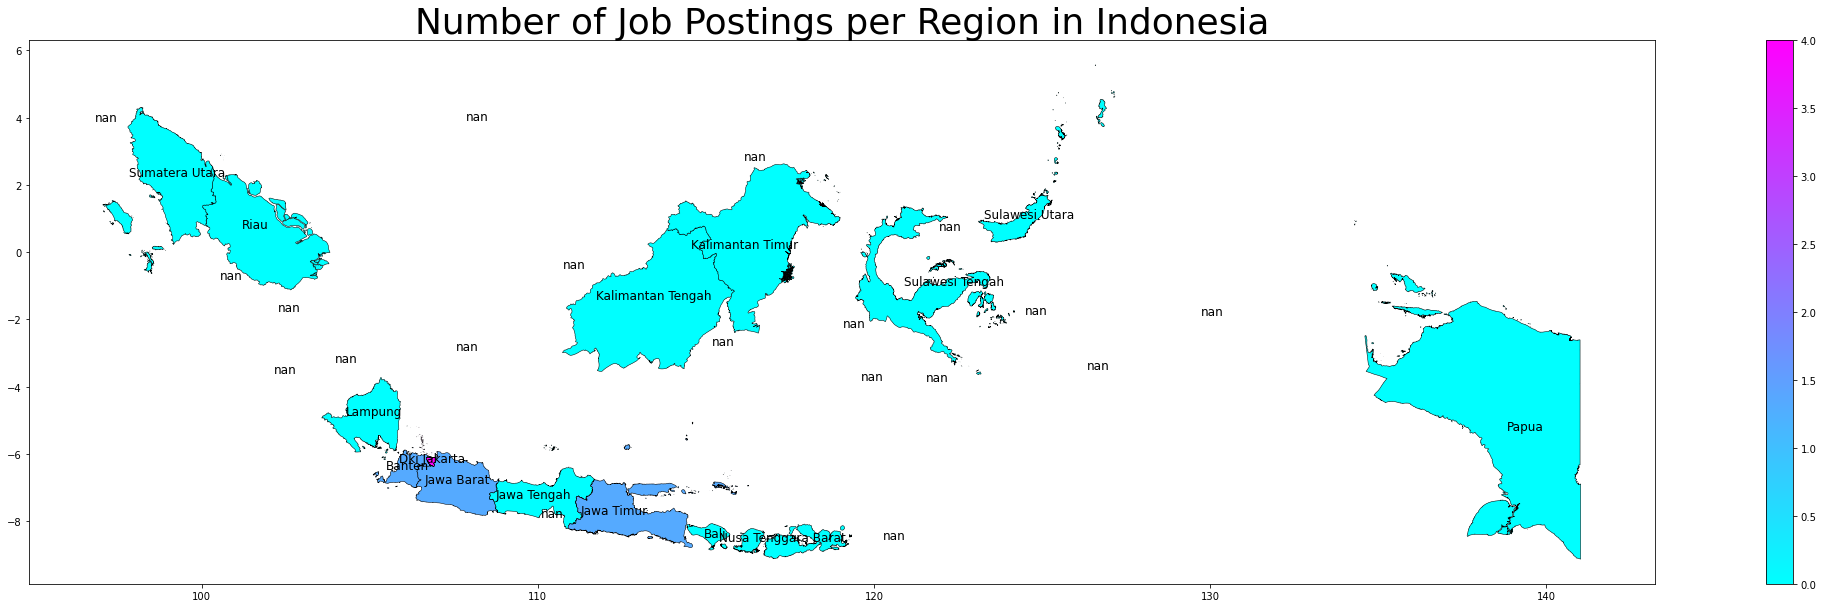

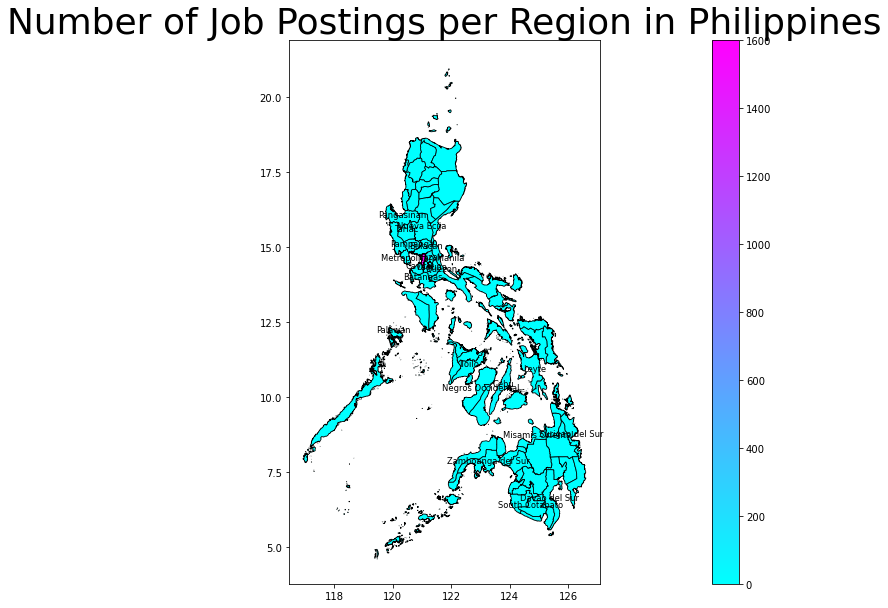

In [5]:
if section == "Maps":
    st.subheader('Maps')
    '''
    # Heat Map of the Data-Related Job Distribution in Indonesia
    Jakarta, Banten, Jawa Barat and Jawa Timur are the hot spots for employment in Indonesia.
    '''
    #load the shapes of the regions
    shapefile = 'idn_admbnda_adm1_bps_20200401.shp'
    id_map = gpd.read_file(shapefile)
    #load the counts per region
    id_jobs = pd.read_csv("job_posting_indonesia.csv")
    #merge the map and count of jobs dataset
    merged_id_df = pd.merge(id_map,id_jobs,left_on='ADM1_EN',right_on='Province',how='left')
    # set a variable that will call whatever column we want to visualise on the map
    variable = 'Job Posting Range'
    # set the range for the choropleth
    vmin, vmax = 0,4
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(40, 10))
    ax.set_facecolor('xkcd:white')
    #add a title
    ax.set_title('Number of Job Postings per Region in Indonesia', fontdict={'fontsize': '36', 'fontweight' : '3'})
    # Add Labels
    merged_id_df['coords'] = merged_id_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    merged_id_df['coords'] = [coords[0] for coords in merged_id_df['coords']]
    for idx, row in merged_id_df.iterrows():
        plt.annotate(s=row['Province'], xy=row['coords'],horizontalalignment='center',fontsize='large')

    merged_id_df.plot(column=variable, cmap='cool', linewidth=0.5, ax=ax, edgecolor='black')
    sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    #fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
    #Philippines Map
    ph_jobs = pd.read_csv("PhilDataSet.csv")
    #from shapely.geometry import shape, Point
    shapefile = 'Provinces.shp'
    ph_map = gpd.read_file(shapefile)
    merged_ph_df = pd.merge(ph_map,ph_jobs,left_on='NAME_1',right_on='Row Labels',how='left')
    merged_ph_df['Sum of Count'] = merged_ph_df['Sum of Count'].fillna(0)
    merged_ph_df['Row Labels'] = merged_ph_df['Row Labels'].fillna('')
    merged_ph_df
    # set a variable that will call whatever column we want to visualise on the map
    variable = 'Sum of Count'
    # set the range for the choropleth
    vmin, vmax = 0,1600
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(40, 10))
    ax.set_facecolor('xkcd:white')
    #add a title
    ax.set_title('Number of Job Postings per Region in Philippines', fontdict={'fontsize': '36', 'fontweight' : '3'})
    # Add Labels
    merged_ph_df['coords'] = merged_ph_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    merged_ph_df['coords'] = [coords[0] for coords in merged_ph_df['coords']]
    for idx, row in merged_ph_df.iterrows():
        plt.annotate(s=row['Row Labels'], xy=row['coords'],horizontalalignment='center',fontsize='small')

    merged_ph_df.plot(column=variable, cmap='cool', linewidth=0.8, ax=ax, edgecolor='black')
    sm = plt.cm.ScalarMappable(cmap='cool',norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    


## Top Industries per Country

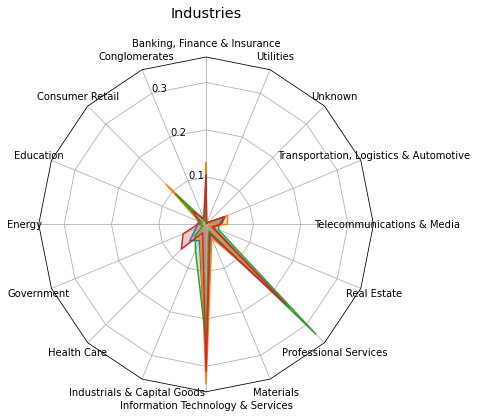

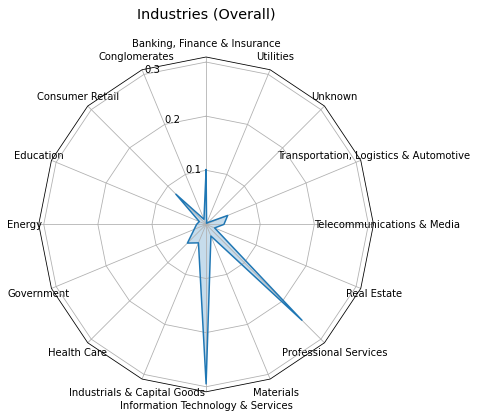

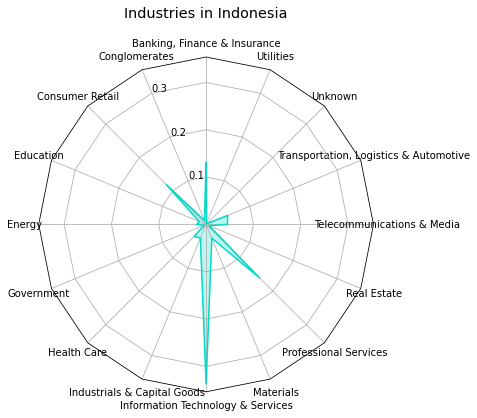

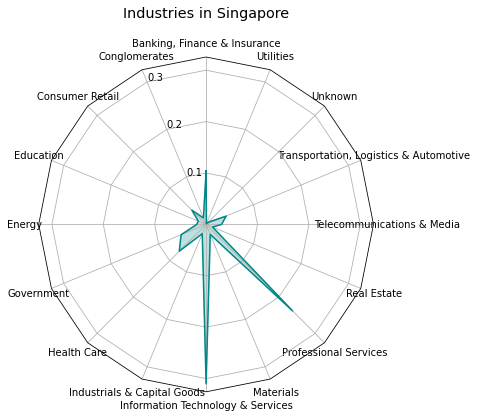

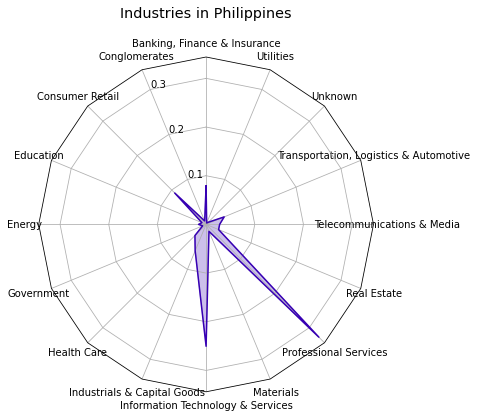

In [43]:
if section == "Industry Comparison":
    st.subheader('Industry Comparison')
    
    dfindustry = pd.read_csv('industry_lookupv2.csv')
    dfJobs = pd.read_csv('df_EskwelabsCapstonev3.csv')
    dfindustry['Classified Industry'].sort_values(ascending=True).unique()
    dfOverall = dfindustry.groupby('Classified Industry').agg(value_count = ('Classified Industry','count')).sort_values(by = ['Classified Industry','value_count'], ascending = True)
    dfJobs[(dfJobs['Industry']=='Information Technology & Services')&(dfJobs['Country']=='Philippines')]['Company'].value_counts().head(20)
    dfJobs[(dfJobs['Industry']=='Professional Services')&(dfJobs['Country']=='Philippines')]['Company'].value_counts().head(20)
    dfJobs[(dfJobs['Industry']=='Consumer Retail')&(dfJobs['Country']=='Philippines')]['Company'].value_counts().head(20)
    total = dfOverall['value_count'].sum()
    dfOverall['percentage']=dfOverall['value_count']/total
    dfPH = dfindustry[dfindustry['Country']=='Philippines'].groupby('Classified Industry').agg(value_count = ('Classified Industry','count')).sort_values(by = ['Classified Industry','value_count'], ascending = True)
    totalPH = dfPH['value_count'].sum()
    dfPH['percentage']=dfPH['value_count']/totalPH
    dfSG = dfindustry[dfindustry['Country']=='Singapore'].groupby('Classified Industry').agg(value_count = ('Classified Industry','count')).sort_values(by = ['Classified Industry','value_count'], ascending = True)
    totalSG = dfSG['value_count'].sum()
    dfSG['percentage']=dfSG['value_count']/totalSG
    dfID = dfindustry[dfindustry['Country']=='Indonesia'].groupby('Classified Industry').agg(value_count = ('Classified Industry','count')).sort_values(by = ['Classified Industry','value_count'], ascending = True)
    totalID = dfID['value_count'].sum()
    dfID['percentage']=dfID['value_count']/totalID
    def radar_factory(num_vars, frame='circle'):
        """Create a radar chart with `num_vars` axes.

        This function creates a RadarAxes projection and registers it.

        Parameters
        ----------
        num_vars : int
            Number of variables for radar chart.
        frame : {'circle' | 'polygon'}
            Shape of frame surrounding axes.

        """
        # calculate evenly-spaced axis angles
        theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

        class RadarAxes(PolarAxes):

            name = 'radar'

            def __init__(self, *args, **kwargs):
                super().__init__(*args, **kwargs)
                # rotate plot such that the first axis is at the top
                self.set_theta_zero_location('N')

            def fill(self, *args, closed=True, **kwargs):
                """Override fill so that line is closed by default"""
                return super().fill(closed=closed, *args, **kwargs)

            def plot(self, *args, **kwargs):
                """Override plot so that line is closed by default"""
                lines = super().plot(*args, **kwargs)
                for line in lines:
                    self._close_line(line)

            def _close_line(self, line):
                x, y = line.get_data()
                # FIXME: markers at x[0], y[0] get doubled-up
                if x[0] != x[-1]:
                    x = np.concatenate((x, [x[0]]))
                    y = np.concatenate((y, [y[0]]))
                    line.set_data(x, y)

            def set_varlabels(self, labels):
                self.set_thetagrids(np.degrees(theta), labels)

            def _gen_axes_patch(self):
                # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
                # in axes coordinates.
                if frame == 'circle':
                    return Circle((0.5, 0.5), 0.5)
                elif frame == 'polygon':
                    return RegularPolygon((0.5, 0.5), num_vars,
                                          radius=.5, edgecolor="k")
                else:
                    raise ValueError("unknown value for 'frame': %s" % frame)

            def draw(self, renderer):
                """ Draw. If frame is polygon, make gridlines polygon-shaped """
                if frame == 'polygon':
                    gridlines = self.yaxis.get_gridlines()
                    for gl in gridlines:
                        gl.get_path()._interpolation_steps = num_vars
                super().draw(renderer)


            def _gen_axes_spines(self):
                if frame == 'circle':
                    return super()._gen_axes_spines()
                elif frame == 'polygon':
                    # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                    spine = Spine(axes=self,
                                  spine_type='circle',
                                  path=Path.unit_regular_polygon(num_vars))
                    # unit_regular_polygon gives a polygon of radius 1 centered at
                    # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                    # 0.5) in axes coordinates.
                    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                        + self.transAxes)


                    return {'polar': spine}
                else:
                    raise ValueError("unknown value for 'frame': %s" % frame)

        register_projection(RadarAxes)
        return theta

    #all data
    '''
    # Top 3 Industries Overall
    These are the following:
    - IT & Services
    - Professional Services
    - Banking, Finance and Insurance
    '''
    data = [dfindustry['Classified Industry'].sort_values(ascending=True).unique(),
            ('Industries', [
                dfOverall['percentage'],
                dfID['percentage'],
                dfPH['percentage'],
                dfSG['percentage']
            ])]

    N = len(data[0])
    theta = radar_factory(N, frame='polygon')

    spoke_labels = data.pop(0)
    title, case_data = data[0]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids([0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,0.9])
    ax.set_title(title,  position=(0.5, 1.1), ha='center',size='x-large',color='black')

    for d in case_data:
        line = ax.plot(theta, d)
        ax.fill(theta, d, alpha=0.25)
    ax.set_varlabels(spoke_labels)
    #fig.savefig("%s.png" % name)

    plt.show()
    #overall
    data = [dfindustry['Classified Industry'].sort_values(ascending=True).unique(),
            ('Industries (Overall)', [
                dfOverall['percentage']
            ])]

    N = len(data[0])
    theta = radar_factory(N, frame='polygon')

    spoke_labels = data.pop(0)
    title, case_data = data[0]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    #ax.set_rgrids([0, 100,200, 300, 400,500,600])
    ax.set_rgrids([0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,0.9])
    ax.set_title(title,  position=(0.5, 1.1), ha='center',size='x-large')

    for d in case_data:
        line = ax.plot(theta, d)
        ax.fill(theta, d,  alpha=0.25)
    ax.set_varlabels(spoke_labels)

    plt.show()
    '''
    # Top 3 Industries in Indonesia
    These are the following:
    - IT & Services
    - Professional Services
    - Banking, Finance and Insurance
    '''
    #Indonesia
    data = [dfindustry['Classified Industry'].sort_values(ascending=True).unique(),
            ('Industries in Indonesia', [
                dfID['percentage']
            ])]

    N = len(data[0])
    theta = radar_factory(N, frame='polygon')

    spoke_labels = data.pop(0)
    title, case_data = data[0]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    #ax.set_rgrids([0, 50,100, 150, 200,250,300])
    ax.set_rgrids([0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,0.9])
    ax.set_title(title,  position=(0.5, 1.1), ha='center',size='x-large')

    for d in case_data:
        line = ax.plot(theta, d,color='#03DAC6')
        ax.fill(theta, d,  alpha=0.25,color='#03DAC6')
    ax.set_varlabels(spoke_labels)

    plt.show()
    '''
    # Top 3 Industries in Singapore
    These are the following:
    - IT & Services
    - Professional Services
    - Banking, Finance and Insurance
    '''
    #Singapore
    data = [dfindustry['Classified Industry'].sort_values(ascending=True).unique(),
            ('Industries in Singapore', [
                dfSG['percentage']
            ])]

    N = len(data[0])
    theta = radar_factory(N, frame='polygon')

    spoke_labels = data.pop(0)
    title, case_data = data[0]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    #ax.set_rgrids([0, 50,100, 150, 200,250,300])
    ax.set_rgrids([0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,0.9])
    ax.set_title(title,  position=(0.5, 1.1), ha='center',size='x-large')

    for d in case_data:
        line = ax.plot(theta, d,color='#018786')
        ax.fill(theta, d,  alpha=0.25,color='#018786')
    ax.set_varlabels(spoke_labels)

    plt.show()
    #Philippines
    '''
    # Top 3 Industries in the Philippines
    These are the following:
    - Professional Services
    - IT & Services
    - Consumer & Retail
    '''
    data = [dfindustry['Classified Industry'].sort_values(ascending=True).unique(),
            ('Industries in Philippines', [
                dfPH['percentage']
            ])]

    N = len(data[0])
    theta = radar_factory(N, frame='polygon')

    spoke_labels = data.pop(0)
    title, case_data = data[0]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    #ax.set_rgrids([0, 100,200, 300, 400,500,600])
    #ax.set_rgrids([0, 50,100, 150, 200,250,300])
    ax.set_rgrids([0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,0.9])
    ax.set_title(title,  position=(0.5, 1.1), ha='center',size='x-large')

    for d in case_data:
        line = ax.plot(theta, d,color='#3700B3')
        ax.fill(theta, d,  alpha=0.25,color='#3700B3')
    ax.set_varlabels(spoke_labels)

    plt.show()

## Posting Duration of Jobs per Job Role

In [53]:
if section == 'Posting Age':
    st.subheader('Posting Age')
    dfGlassdoor = pd.read_csv('Glassdoor_all_jobs_sample.csv')
    #remove the d component by applying regex
    dfGlassdoor['Age'] = dfGlassdoor['Age'].replace(r'[d+]$',value='',regex=True) 
    dfGlassdoor['Age'] = dfGlassdoor['Age'].replace(r'[d+]$',value='',regex=True) 
    #remove the hour component and convert to 1 day
    dfGlassdoor['Age'] = dfGlassdoor['Age'].replace(r'^\d+[h]$',value='1',regex=True) 
    #convert to numeric
    dfGlassdoor['Age'] = pd.to_numeric(dfGlassdoor['Age'])
    # Overall
    '''
    '''
    sns.set_style("whitegrid")
    ax = sns.boxplot(x="Keyword", y="Age", data=dfGlassdoor.sort_values(by=['Keyword']),color='#B2EBF2')
    plt.ylabel('Days since job is posted',size='medium')
    plt.xlabel('Job Position',size='medium')
    plt.title("Posting Duration based on Job Role (Overall)",size='x-large')
    medians = dfGlassdoor.groupby(['Keyword'])['Age'].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.show(ax)

    #Philippines
    dfPhilippines = dfGlassdoor[dfGlassdoor['Country']=='Philippines']
    flatui = ['#EDE7F6','#D1C4E9','#B39DDB','#9575CD']
    ax = sns.boxplot(x="Keyword", y="Age", data=dfPhilippines.sort_values(by=['Keyword']),palette=flatui)
    plt.ylabel('Days since job is posted',size='medium')
    plt.xlabel('Job Position',size='medium')
    plt.title("Posting Duration based on Job Role in the Philippines",size='x-large')
    medians = dfPhilippines.groupby(['Keyword'])['Age'].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='medium', color='black', weight='semibold')    
    plt.show(ax)

    # Indonesia
    dfIndonesia =  dfGlassdoor[dfGlassdoor['Country']=='Indonesia']
    flatui = ['#E0F7FA','#B2EBF2','#80DEEA','#4DD0E1']
    sns.set_style("whitegrid")
    ax = sns.boxplot(x="Keyword", y="Age", data=dfIndonesia.sort_values(by=['Keyword']),palette=flatui)
    plt.ylabel('Days since job is posted',size='medium')
    plt.xlabel('Job Position',size='medium')
    plt.title("Posting Duration based on Job Role in Indonesia",size='x-large')
    medians = dfIndonesia.groupby(['Keyword'])['Age'].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='medium', color='#000000', weight='semibold')
    plt.show(ax)

    #Singapore
    dfSingapore = dfGlassdoor[dfGlassdoor['Country']=='Singapore']
    flatui = ['#B2DFDB','#80CBC4','#4DB6AC','#26A69A']
    sns.set_style("whitegrid")
    ax = sns.boxplot(x="Keyword", y="Age", data=dfSingapore.sort_values(by=['Keyword']),palette=flatui)
    plt.ylabel('Days since job is posted',size='medium')
    plt.xlabel('Job Position',size='medium')
    plt.title("Posting Duration based on Job Role in Singapore",size='x-large')
    medians = dfSingapore.groupby(['Keyword'])['Age'].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='medium', color='black', weight='semibold')
    plt.show(ax)

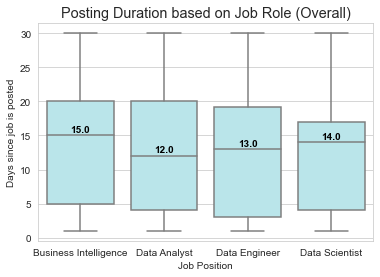

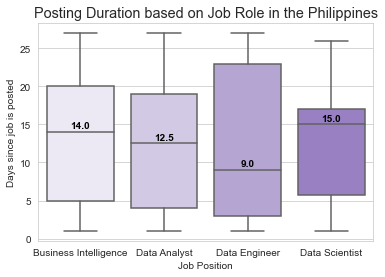

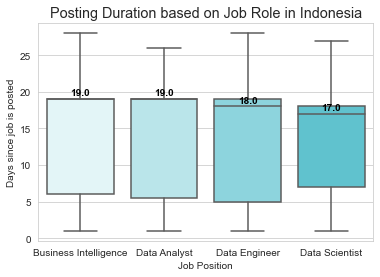

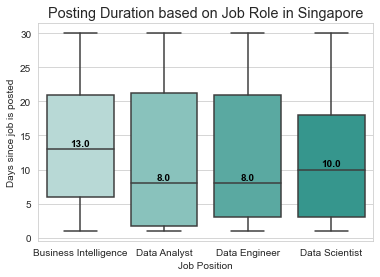

## Conclusion

To summarize our project, Singapore sets a higher standard when looking for Data Scientists, while Philippines and Indonesia are at par with each other. Most Data Science jobs are found at the capital or center of a country. Information Technology and Services is the leading industry looking for data-related jobs. Python and SQL are the most in-demand skills for data science positions.